In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000846901"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000846901
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,LAKELAND BANCORP INC
Ticker,LBAI


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,46.0,9.810435e+00,2.231816e+00,2.0,9.21,9.625000e+00,1.098250e+01,13.51
interest income,67.0,3.219852e+07,1.032607e+07,3949000.0,27639500.00,3.099200e+07,3.578100e+07,63177000.00
net income,67.0,6.260418e+06,4.571390e+06,-12722000.0,4461000.00,5.116000e+06,7.900500e+06,16758000.00
net interest income,67.0,2.506264e+07,9.558762e+06,3200000.0,17495000.00,2.405700e+07,2.859350e+07,48606000.00
provision for loan losses,64.0,2.734859e+06,4.549427e+06,0.0,747500.00,1.275500e+06,3.886250e+06,34083000.00
total revenue,37.0,3.652465e+07,8.229636e+06,28003000.0,29482000.00,3.326100e+07,4.493500e+07,54329000.00


# Plots

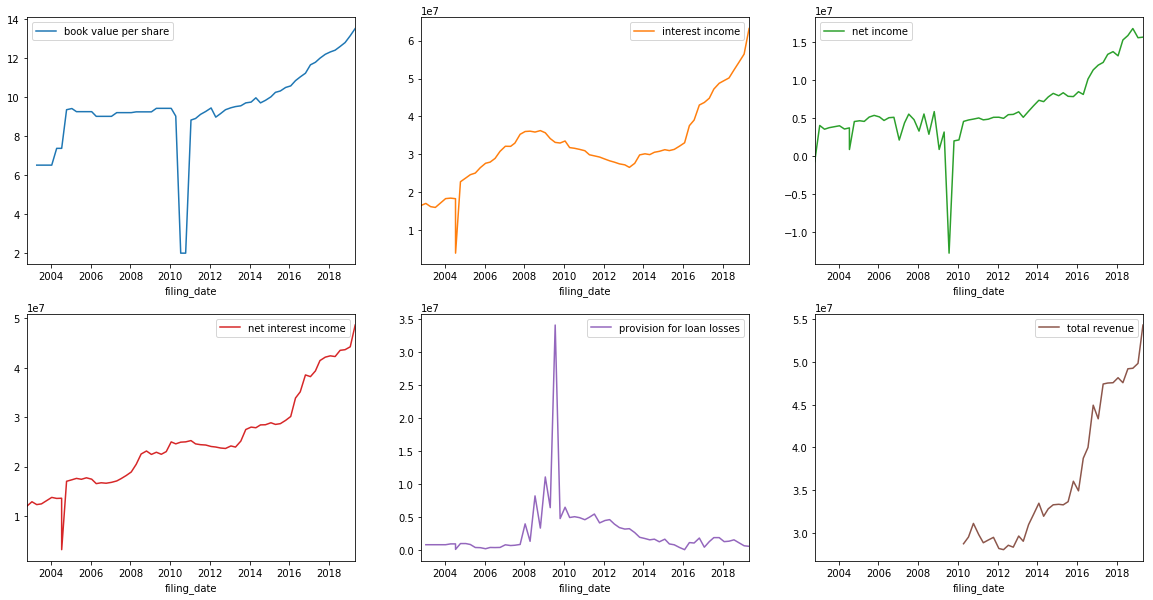

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0000846901 book value per share        2002Q3 to 2002Q4: 2 periods    missing   
           book value per share        2003Q2 to 2003Q4: 3 periods    missing   
           book value per share                             2004Q2    missing   
           book value per share        2005Q2 to 2005Q4: 3 periods    missing   
           book value per share        2006Q2 to 2006Q4: 3 periods    missing   
           book value per share        2007Q2 to 2007Q4: 3 periods    missing   
           book value per share        2008Q2 to 2008Q4: 3 periods    missing   
           book value per share        2009Q2 to 2009Q4: 3 periods    missing   
           interest income                                  2003Q3    missing   
           interest income                                  2003Q4  duplicate   
           net income                                       2002Q4  duplicate   
           net income                                       2003Q3    missing   
           net interest income                              2003Q3    missing   
           net interest income                              2003Q4  duplicate   
           provision for loan losses                        2002Q3    missing   
           provision for loan losses   2003Q2 to 2003Q3: 2 periods    missing   
           provision for loan losses                        2003Q4  duplicate   
           provision for loan losses                        2004Q2    missing   
           total revenue              2002Q3 to 2009Q4: 30 periods    missing   

                                               message  
cik        item                                         
0000846901 book value per share         Missing period  
           book value per share         Missing period  
           book value per share         Missing period  
           book value per share         Missing period  
           book value per share         Missing period  
           book value per share         Missing period  
           book value per share         Missing period  
           book value per share         Missing period  
           interest income              Missing period  
           interest income            Duplicate period  
           net income                 Duplicate period  
           net income                   Missing period  
           net interest income          Missing period  
           net interest income        Duplicate period  
           provision for loan losses    Missing period  
           provision for loan losses    Missing period  
           provision for loan losses  Duplicate period  
           provision for loan losses    Missing period  
           total revenue                Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()